In [ ]:
#import dataset
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#checking for null values


In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score,classification_report,confustion_matrix,fi_score

In [32]:
#checking for null values

In [34]:
data.TotalCharges=pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().any()

AttributeError: ignored

In [35]:
data["TotalCharges"].fillna(data["TotalCharges"].median(),inplace=True)
data.isnull().sum()

KeyError: ignored

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Partner"] = le.fit_transform(data["Partner"])
data["Dependents"] = le.fit_transform(data["Dependents"])
data["PhoneService"] = le.fit_transform(data["PhoneService"])
data["MultipleLines"] = le.fit_transform(data["MultipleLines"])
data["InternetService"] = le.fit_transfrm(data["InternetService"])
data["OnlineSecurity"] = le.fit_transform(data["OnlineSecurity"])
data["OnlineBackup"] = le.fit_transform(data["OnlineBackup"])
data["DeviceProtection"] = le.fit_transform(data["DeviceProtection"])
data["TechSupport"] = le.fit_transform(data["TechSupport"])
data["StreamimgTV"] = le.fit_transform(data["StreamingTV"])
data["StreamingMovies"] = le.fit_transform(data["StreamingMovies"])
data["Contract"] = le.fit_transform(data["Contract"])
data["PaperlessBilling"] = le.fit_transform(data["PaperlessBiing"])
data["PaymentMethod"] = le.fit_transform(data["Paymentmethod"])
data["Churn"] = le.fit_transform(data["Churn"])


KeyError: ignored

In [48]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,228,0,0,24,2,0,0,1,1,101348.88,1
1,2,15647311,Hill,217,2,0,23,1,743,0,0,1,112542.58,0
2,3,15619304,Onio,111,0,0,24,8,5793,2,1,0,113931.57,1
3,4,15701354,Boni,308,0,0,21,1,0,1,0,0,93826.63,0
4,5,15737888,Mitchell,459,2,0,25,2,3696,0,1,1,79084.10,0


In [49]:
x = data.iloc[1,0:19].values
y = data.iloc[1,19:20].values


In [50]:
x

array([2, 15647311, 'Hill', 217, 2, 0, 23, 1, 743, 0, 0, 1, 112542.58, 0],
      dtype=object)

In [51]:
y

array([], dtype=object)

In [56]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a= one.fit_transform(x[:,6:7]).toarray()
b= one.fit_transform(x[:,7:8]).toarray()
c= one.fit_transform(x[:,8:9]).toarray()
d= one.fit_transform(x[:,9:10]).toarray()
e= one.fit_transform(x[:,10:11]).toarray()
f= one.fit_transform(x[:,11:12]).toarray()
g= one.fit_transform(x[:,12:13]).toarray()
h= one.fit_transform(x[:,13:14]).toarray()
i= one.fit_transform(x[:,14:15]).toarray()
j= one.fit_transform(x[:,16:17]).toarray()
x=np.delete(x,[6,7,8,9,10,11,12,13,14,16],axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x),axis=1)

IndexError: ignored

In [58]:
#from imblearn.over_sampling import SMOT

In [ ]:
smt = SMOTE()

In [67]:


data.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,259.584600,0.746300,0.545700,20.920600,5.012800,2036.788100,0.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.496107,0.827529,0.497932,10.482065,2.892174,2125.232536,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,193.000000,0.000000,0.000000,14.000000,3.000000,0.000000,0.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,261.000000,0.000000,1.000000,19.000000,5.000000,1383.500000,0.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,327.000000,1.000000,1.000000,26.000000,7.000000,3882.250000,1.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,459.000000,2.000000,1.000000,69.000000,10.000000,6381.000000,3.000000,1.00000,1.000000,199992.480000,1.000000


<ipython-input-76-40e5ca70a0a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Tenure"])


<Axes: >

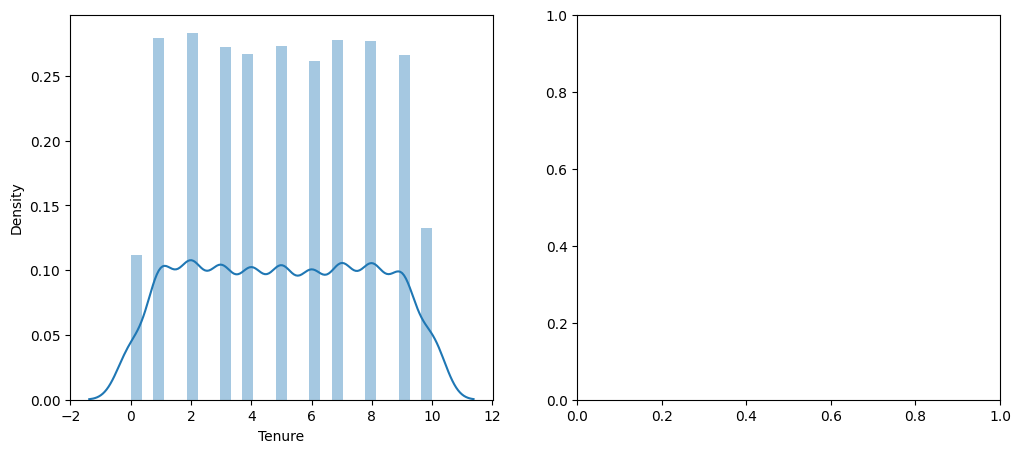

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["Tenure"])
plt.subplot(1,2,2)


<Axes: >

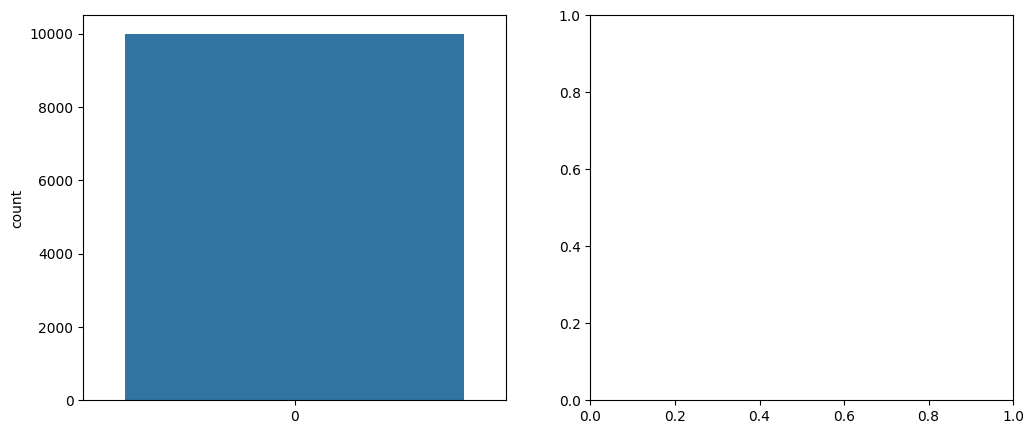

In [79]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data["Gender"])
plt.subplot(1,2,2)


In [82]:
sns.barplot(x="Churn", y="MonthlyCharges",data=data)


ValueError: ignored

<Axes: >

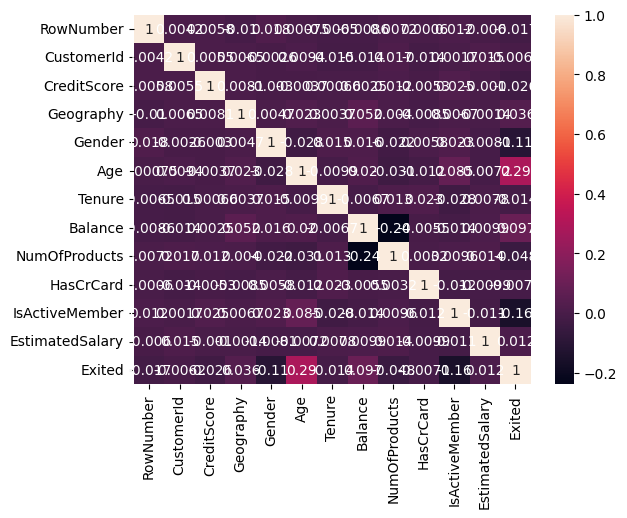

In [84]:
sns.heatmap(data.corr(), annot=True)

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size = 0.2, random_state = 0)

NameError: ignored

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transfrom(x_train)
x_test = sc.fit_transform(x_test_)

AttributeError: ignored

In [92]:
x_train.shape

NameError: ignored

In [98]:
#importing and buliding the Decision tree model
def logreg(x_train,x_test,y_train,y_test):
lr = LogisticRegression(random_state=0)
LogisticRegression.fit(x_train,y_train)
y_lr_tr = lr.predict(x_train)
print(accuracy_score(y_lr_tr,y_train))
yPred_lr = lr.predict(x_test)
print(accuracy_score(yPred_lr,y_test))
print("***Logistic Regression***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,yPred_lr)
print("Classification Report")
print(classification_report(y_test,yPred_lr)) 

IndentationError: ignored

In [101]:
#importing and building the Decision tree model
def decisionTree(x_train,x_test,y_train,y_test):
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
    dtc.fit(x_train,y_train)
    y_dt_tr - dtc.predict(x_train)
    print(accuracy_score(y_dt_tr,y_train))
    yPred_dt = dtc.predict(x_test)
    print(accuracy_score(yPred_dt,y_test))
    print("***Decision Tree***")
    print("Confusion Matrix")
    print(confusion_matrix(y_test,yPred_dt))
    print("Classification Report")
    print(classification_reort(y_test,yPred_dt))


In [103]:
#printing the train accuracy and test accuracy respectively
decisionTree(x_train,x_test,y_train,y_test)


NameError: ignored

In [107]:
#importing and building the random forest model
def RandomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
    rf.fit(x_train,y_train)
    y_rf_tr = rf.predict(x_train)
    print(accuracy_score(y_rf_tr,y_train))
    yPred_rf = rf.predict(x_test)
    print(accuracy_score(yPred_rf,y_test))
    print("***Random Forest***")
    print("Classification Reprt")
    print(classification_report(y_test,yPred_rf))

In [109]:

#printing the train accuracy and test accurac respectively
RandomForest(x_train,x_test,y_train,y_test)



NameError: ignored

In [110]:

#importing and building the KNN model
def KNN(x_train,x_test,y_train,y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_knn_tr = knn.predict(x_train)
    print(accuracy_score(y_knn_tr,y_train))
    yPred_knn = knn.predict(x_test)
    print(accuracy_score(yPred_knn,y_test))
    print("***KNN***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_knn))
    print("Classification Report")
    print(classification_report(y_test,yPred_knn))


In [111]:

#printing the train accuracy and test accuracy respectively
KNN(x_train,x_test,y_train,y_test)

NameError: ignored

In [112]:
#importing and building the random forest model
def svm(x_train,x_test,y_train,y_test):
    svm = SVC(kernel = "linear")
    svm.fit(x_train,y_train)
    y_svm_tr = svm.predict(x_train)
    print(accuracy_score(y_svm_tr,y_train))
    yPred_svm = svm.predict(x_test)
    print(accuracy_score(yPred_svm,y_test))
    print("***Support Vector Machine***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_svm))
    print("Classification_report(y_test,yPred_svm))

SyntaxError: ignored

In [113]:
#printing the train accuracy and test accuracy respectively
svm(x_train,x_test,y_train,y_test)

NameError: ignored

In [114]:
#importing the keras libraries and packages
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [115]:
# Initialising the ANN
classifier = Sequential()

In [116]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=30, activation='relu', input_dim=40))


In [117]:
# Adding the second hidden layer
classifier.add(Dense(units=30, activation='relu'))

In [118]:

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [120]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [123]:
#Fitting the ANN to the Training set
model_history = classifier.fit(x_train,y_train, batch_size=10, validation_split=0.33, epochs=200)

NameError: ignored

In [125]:
ann_pred = classifier.predict(x_test)
ann_pred = (ann_pred>0.5)
ann_pred

NameError: ignored

In [126]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("classification Report")
print(classification_report(y_test,ann_pred))

NameError: ignored

In [127]:
#testing on random input values
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Predicting on random input")
lr_pred_own = lr.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",lr_pred_own)

NameError: ignored

In [128]:
#testing on random input values
dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y-train)
print("Predicting on random input")
dtc_pred_own = dtc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",dtc_pred_own)

NameError: ignored

In [130]:
#testing on random input values
rf = RandomForestClassifier(criterion="entropy",n_estimation=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own = rf.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",rf_pred_own)

TypeError: ignored

In [132]:
#testing on random input values
svc = SVC(kernel = "linear")
svc.fit(x_train,y_train)
print("Predicting on random input")
svm_pred_own = svc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",svm_pred_own)

NameError: ignored

In [133]:
#testing on random input values
knn = KNeighborsCassifier()
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own = knn.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",knn_pred_own)

NameError: ignored

In [134]:
#testing on random input values
print("Predicting on random input")
ann_pred_own = classifier,predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print(ann_pred_own)
ann_pred_own = (ann_pred_own>0.5)
print("output is: ",ann_pred_own)

Predicting on random input


NameError: ignored

In [136]:

def compareModel(X_train,X_test,y_train,y_test):
    logreg(x_train,x_test,y_train,y_test)
    print('-'*100)
    decisionTree(X_train,X_test,y_train,y_test)
    print('-'*100)
    RandomForest(X_train,X_test,y_train,y_test)
    print('-'*100)
    svm(X_train,X_test,y_train,y_test)
    print('-'*100)
    KNN(X_train,X_test,y_train,y_test)
    print('-'*100)

In [137]:
compareModel(x_train,x_test,y_train,y_test)

NameError: ignored

In [138]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))


NameError: ignored

In [139]:
y_rf = model.predict(x_train)
print(accuracy_score(y_rf,y_train))
yPred_rfcv = model.predict(x_test)
print(accurcy_score(yPred_rfcv,y_test))
print("***Random Forest after Hyperparameter tuning***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,yPred_rfcv))
print("Classification Report")
print(classification_report(y_test,yPred_rfcv))
print("Predicting on random input")
rfcv_pred_own = model.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",rfcv_pred_own)


NameError: ignored

In [140]:
classifier.save("telcom_churn.h5")

In [141]:
from flask import Flask, render_template, request
import keras
from keras.models import load_model


In [142]:
app = Flask(__name__)
model = load_model("telcom_churn.h5")

In [144]:
@app.route('/') # rendering the html template
def home():
    return render_template('home.html')
 

In [145]:
@app.route('/')
def helloworld():
    return render_template("base.html")
@app.route('/assesment')
def prediction():
    return render_template("index.html")

@app.route('/predict', methods = ['POST'])
def admin():
    a= request.form["gender"]
    if (a == 'f'):
        a=0
    if (a == 'm'):
        a=1
    b= request.form["srcitizen"]
    if (b =='n'):
        b=0
    if (b == 'y'):
        b=1
    c= request.form["partner"]
    if (c =='n'):
        c=0
    if (c == 'y'):
        c=1
    d= request.form["dependents"]
    if (d =='n'):
        d=0
    if (d == 'y'):
        d=1
    e= request.form["tenure"]
    f= request.form["phservices"]
    if (f =='n'):
        f=0
    if (f == 'y'):
        f=1
    g= request.form["multi"]
    if (g =='n'):
       g1,g2,g3=1,0,0
    if (g =='nps'):
        g1,g2,g3=0,1,0
    if (g =='y'):
        g1,g2,g3=0,0,1
    h= request.form["is"]
    if (h =='dsl'):
       h1,h2,h3=1,0,0
    if (h =='fo'):
        h1,h2,h3=0,1,0
    if (h =='n'):
        h1,h2,h3=0,0,1
    i= request.form["os"]
    if (i =='n'):
       i1,i2,i3=1,0,0
    if (i =='nis'):
        n1,n2,n3=0,1,0
    if (i =='y'):
        i1,i2,i3=0,0,1
    j= request.form["ob"]
    if (j =='n'):
       j1,j2,j3=1,0,0
    if (j =='nis'):
        j1,j2,j3=0,1,0
    if (j =='y'):
        j1,j2,j3=0,0,1
    k= request.form["dp"]
    if (k =='n'):
       k1,k2,k3=1,0,0
    if (k =='nis'):
        k1,k2,k3=0,1,0
    if (k =='y'):
        k1,k2,k3=0,0,1
    l= request.form["ts"]
    if (l =='n'):
       l1,l2,l3=1,0,0
    if (l =='nis'):
        l1,l2,l3=0,1,0
    if (l =='y'):
        l1,l2,l3=0,0,1
    m= request.form["stv"]
    if (m =='n'):
       m1,m2,m3=1,0,0
    if (m =='nis'):
        m1,m2,m3=0,1,0
    if (m =='y'):
        m1,m2,m3=0,0,1
    n= request.form["smv"]
    if (n =='n'):
       n1,n2,n3=1,0,0
    if (n =='nis'):
        n1,n2,n3=0,1,0
    if (n =='y'):
        n1,n2,n3=0,0,1
    o= request.form["contract"]
    if (o =='mtm'):
       o1,o2,o3=1,0,0
    if (o =='oyr'):
        o1,o2,o3=0,1,0
    if (o =='tyrs'):
        o1,o2,o3=0,0,1
    p= request.form["pmt"]
    if (p =='ec'):
       p1,p2,p3,p4=1,0,0,0
    if (p =='mail'):
        p1,p2,p3,p4=0,1,0,0
    if (p =='bt'):
        p1,p2,p3,p4=0,0,1,0
    if (p == 'cc'):
        p1,p2,p3,p4=0,0,0,1
    q= request.form["plb"]
    if (q =='n'):
    q= request.form["plb"]
    if (q == 'n'):
        q=0
    if (q == 'y'):
        q=1
    r= request.form["mcharges"]
    s= request.form["tcharges"]

    t=[[int(g1),int(g2),int(g3),int(h1),int(h2),int(h3),int(i1),int(i2),int(i3),int(j1),int(j2),int(j3),int(k1),int(k2),int(k3),int(l1),int(l2),int(l3),int(m1),int(m2),int(m3),int(n1),int(n2),int(n3),int(o1),int(o2),int(o3),int(p1),int(p2),int(p3),int(p4),int(q1)]]
    print(t)
    x = model.predict(t)
    print(x[0])
    if (x[[0]] <=0.5):
        y="No"
        return render_template(predno.html", z = y)


    if (x[[0]] >= 0.5):
       y ="Yes"
       return render_template("predyes.html", z =y)






IndentationError: ignored